In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Company.csv to Company.csv


In [3]:
df=pd.read_csv('Company.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

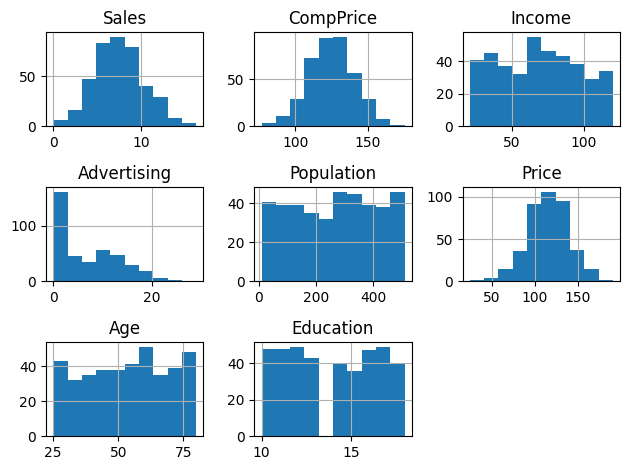

In [7]:
df.hist()
plt.tight_layout()

In [8]:
df.corr()

<ipython-input-8-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


In [9]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [10]:
oe=OrdinalEncoder()
col_sel=df.select_dtypes(include='object').columns
df[col_sel]=oe.fit_transform(df[col_sel])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0.0,42,17,1.0,1.0
1,11.22,111,48,16,260,83,1.0,65,10,1.0,1.0
2,10.06,113,35,10,269,80,2.0,59,12,1.0,1.0
3,7.40,117,100,4,466,97,2.0,55,14,1.0,1.0
4,4.15,141,64,3,340,128,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,1.0,33,14,1.0,1.0
396,6.14,139,23,3,37,120,2.0,55,11,0.0,1.0
397,7.41,162,26,12,368,159,2.0,40,18,1.0,1.0
398,5.94,100,79,7,284,95,0.0,50,12,1.0,1.0


In [11]:
# oe=OrdinalEncoder()
# col_sel=df.select_dtypes(include='object')
# oe_col=oe.fit_transform(col_sel)
# oe_col=pd.DataFrame(oe_col)
# oe_col

In [12]:
# df['ShelveLoc']=oe_col[0]
# df['Urban']=oe_col[1]
# df['US']=oe_col[2]
# df

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    float64
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    float64
 10  US           400 non-null    float64
dtypes: float64(4), int64(7)
memory usage: 34.5 KB


In [14]:
df.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,0.157470,-0.231815,-0.051955,-0.015419,0.177093
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,0.023350,-0.100239,0.025197,0.066594,0.016869
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.067678,-0.004670,-0.056855,0.037967,0.089601
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,0.008544,-0.004557,-0.033594,0.042035,0.684460
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.044772,-0.042663,-0.106378,-0.052025,0.060564
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,0.014633,-0.102177,0.011747,0.047016,0.057861
ShelveLoc,0.157470,0.023350,-0.067678,0.008544,-0.044772,0.014633,1.000000,0.056488,0.001492,-0.063978,-0.039760
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,0.056488,1.000000,0.006488,0.028479,0.008652
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.001492,0.006488,1.000000,-0.033094,-0.078250
Urban,-0.015419,0.066594,0.037967,0.042035,-0.052025,0.047016,-0.063978,0.028479,-0.033094,1.000000,0.047085


<Axes: >

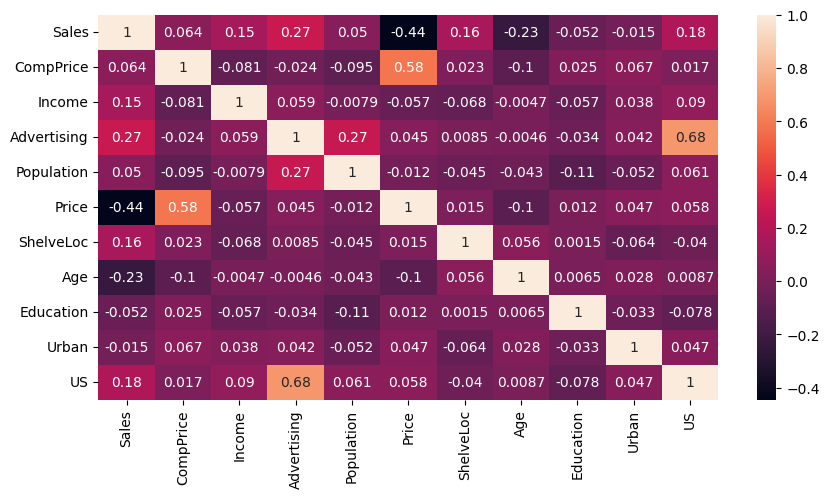

In [15]:
plt.rcParams['figure.figsize']=(10,5)
sns.heatmap(df.corr(),annot=True)

In [16]:
df["sales"]="Bad"
df.loc[df["Sales"]>7.49,"sales"]="Good"
df.drop(["Sales"],axis=1,inplace=True)

In [17]:
df

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0.0,42,17,1.0,1.0,Good
1,111,48,16,260,83,1.0,65,10,1.0,1.0,Good
2,113,35,10,269,80,2.0,59,12,1.0,1.0,Good
3,117,100,4,466,97,2.0,55,14,1.0,1.0,Bad
4,141,64,3,340,128,0.0,38,13,1.0,0.0,Bad
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1.0,33,14,1.0,1.0,Good
396,139,23,3,37,120,2.0,55,11,0.0,1.0,Bad
397,162,26,12,368,159,2.0,40,18,1.0,1.0,Bad
398,100,79,7,284,95,0.0,50,12,1.0,1.0,Bad


In [18]:
x=df.iloc[:,0:10]
y=df.loc[:,'sales']
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0.0,42,17,1.0,1.0
1,111,48,16,260,83,1.0,65,10,1.0,1.0
2,113,35,10,269,80,2.0,59,12,1.0,1.0
3,117,100,4,466,97,2.0,55,14,1.0,1.0
4,141,64,3,340,128,0.0,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1.0,33,14,1.0,1.0
396,139,23,3,37,120,2.0,55,11,0.0,1.0
397,162,26,12,368,159,2.0,40,18,1.0,1.0
398,100,79,7,284,95,0.0,50,12,1.0,1.0


In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=2)

In [20]:
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)

In [21]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         Bad       0.70      0.62      0.66        64
        Good       0.62      0.70      0.66        56

    accuracy                           0.66       120
   macro avg       0.66      0.66      0.66       120
weighted avg       0.66      0.66      0.66       120



In [22]:
confusion_matrix(ytest,ypred)

array([[40, 24],
       [17, 39]])

In [23]:
dt.score(xtrain,ytrain),dt.score(xtest,ytest)

(1.0, 0.6583333333333333)

In [24]:
dt.feature_importances_

array([0.1198474 , 0.05138196, 0.11052199, 0.1317795 , 0.30825863,
       0.0386287 , 0.17393944, 0.04777704, 0.00714614, 0.01071921])

In [25]:
pd.DataFrame({'features':xtrain.columns,
              'IG':dt.feature_importances_
             }).sort_values(by='IG',ascending=False)

,features,IG
4,Price,0.308259
6,Age,0.173939
3,Population,0.131780
0,CompPrice,0.119847
2,Advertising,0.110522
1,Income,0.051382
7,Education,0.047777
5,ShelveLoc,0.038629
9,US,0.010719
8,Urban,0.007146


In [26]:
params = {
    'criterion' : ['gini','entropy'],
    'splitter' : ['best','random'],
    'max_depth' : [2,3,4,6,9,12,16],
    'min_samples_split':[2,4,5,6,8,10]
    }

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
grid = GridSearchCV(DecisionTreeClassifier(), param_grid=params, verbose=-1)

In [29]:
grid.fit(xtrain,ytrain)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 6, 9, 12, 16],
                         'min_samples_split': [2, 4, 5, 6, 8, 10],
                         'splitter': ['best', 'random']},
             verbose=-1)

In [30]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'min_samples_split': 5,
 'splitter': 'random'}

In [31]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=9,splitter='random',min_samples_split=8)

In [32]:
dt1.fit(xtrain,ytrain)
ypred=dt1.predict(xtest)

In [33]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

         Bad       0.70      0.77      0.73        64
        Good       0.70      0.62      0.66        56

    accuracy                           0.70       120
   macro avg       0.70      0.70      0.70       120
weighted avg       0.70      0.70      0.70       120



In [34]:
dt1.score(xtrain,ytrain),dt1.score(xtest,ytest)

(0.9, 0.7)

In [35]:
dt1.feature_importances_

array([0.11815688, 0.07346489, 0.0659727 , 0.04875343, 0.31731579,
       0.16526102, 0.04929557, 0.02962666, 0.04723717, 0.08491588])

In [36]:
pd.DataFrame({'features':xtrain.columns,
              'IG':dt1.feature_importances_
             }).sort_values(by='IG',ascending=False)

,features,IG
4,Price,0.317316
5,ShelveLoc,0.165261
0,CompPrice,0.118157
9,US,0.084916
1,Income,0.073465
2,Advertising,0.065973
6,Age,0.049296
3,Population,0.048753
8,Urban,0.047237
7,Education,0.029627


In [37]:

from sklearn import tree

[Text(0.2922794117647059, 0.95, 'ShelveLoc <= 0.536\nentropy = 1.0\nsamples = 280\nvalue = [137, 143]\nclass = Bad'),
 Text(0.09803921568627451, 0.85, 'Price <= 104.303\nentropy = 0.84\nsamples = 67\nvalue = [49, 18]\nclass = Good'),
 Text(0.0392156862745098, 0.75, 'Age <= 36.543\nentropy = 0.99\nsamples = 25\nvalue = [11, 14]\nclass = Bad'),
 Text(0.0196078431372549, 0.65, 'entropy = 0.0\nsamples = 5\nvalue = [0, 5]\nclass = Bad'),
 Text(0.058823529411764705, 0.65, 'Income <= 106.149\nentropy = 0.993\nsamples = 20\nvalue = [11, 9]\nclass = Good'),
 Text(0.0392156862745098, 0.55, 'CompPrice <= 108.986\nentropy = 0.937\nsamples = 17\nvalue = [11, 6]\nclass = Good'),
 Text(0.0196078431372549, 0.45, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Good'),
 Text(0.058823529411764705, 0.45, 'Income <= 92.308\nentropy = 0.985\nsamples = 14\nvalue = [8, 6]\nclass = Good'),
 Text(0.0392156862745098, 0.35, 'Price <= 95.655\nentropy = 0.845\nsamples = 11\nvalue = [8, 3]\nclass = Good'),
 Tex

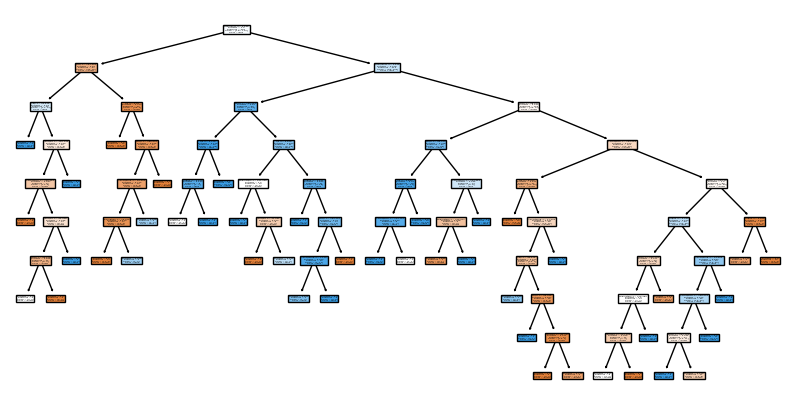

In [38]:
tree.plot_tree(dt1,feature_names=x.columns, class_names=df['sales'].unique(), filled=True)

In [38]:
Price,ShelveLoc,CompPrice,Age column is most important eature to get sale value